In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# Visualize tybalt encoded data using tsne
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [3]:
# load arguments
file_name = 'tybalt_2layer_encoded_10'
encoded_data_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/models/'+file_name+'.tsv'
map_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/metadata/mapping_sampleID_medium.txt'

In [4]:
# read in encoded data
X = pd.read_table(encoded_data_file, header = 0, sep = '\t', index_col = 0)
#X = pd.read_table(encoded_data_file, header = None, sep = '\t', index_col = None) # eADAGE doesn't have header
X = pd.DataFrame(X)
X.head(5)
#X.shape

,1,2,3,4,5,6,7,8,9,10
0.1_12hr_CSV86(Pae_G1a).CEL,0.0,2.708277,0.0,0.0,0.0,4.881811,0.0,7.930926,0.000000,0.926830
0.1_2hr_CSV86(Pae_G1a).CEL,0.0,2.953043,0.0,0.0,0.0,5.521164,0.0,7.688021,0.000000,2.476388
0.1_6hr_CSV86(Pae_G1a).CEL,0.0,3.202902,0.0,0.0,0.0,4.864455,0.0,7.616087,0.097308,1.837508
0.1_7hr_CSV86(Pae_G1a).CEL,0.0,2.934911,0.0,0.0,0.0,5.666560,0.0,7.919647,0.000000,2.087946
0.1_9hr_CSV86(Pae_G1a).CEL,0.0,2.672426,0.0,0.0,0.0,5.353691,0.0,7.288897,0.000000,2.903560


In [5]:
# tSNE raw data in original (all) feature space
tsne = TSNE(n_components=2, init='pca', random_state=123, perplexity=30, learning_rate=300, n_iter=400)
tsne_X = tsne.fit_transform(X)
tsne_X = pd.DataFrame(tsne_X, columns=['1', '2'])
tsne_X.index = X.index
tsne_X.index.name = 'sample_id'       

In [6]:
# Map sample id to clinial phenotype (i.e. experimental condition)

# Note:
# According to the source (https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/decomposition/pca.py#L310),
# input will be transformed by np.array() before doing PCA. So row index will be lost during 
# PCA.fit_transform(X) even using a structured array or a pandas DataFrame. However, the order of the data is preserved, 
# meaning you can attach the index back afterward

# read in mapping file (sample id --> phenotype)
map = pd.read_table(map_file, header = 0, sep = '\t', index_col = 0)

# Join 
X_new = pd.merge(tsne_X, map, left_index=True, right_index=True)
X_new.head(5)
#X_new.shape

,1,2,medium
0.1_12hr_CSV86(Pae_G1a).CEL,22.119427,-14.573008,Mineral salt medium (MSM)
0.1_2hr_CSV86(Pae_G1a).CEL,22.923088,-13.554743,Mineral salt medium (MSM)
0.1_6hr_CSV86(Pae_G1a).CEL,22.640097,-14.452836,Mineral salt medium (MSM)
0.1_7hr_CSV86(Pae_G1a).CEL,22.702465,-13.755980,Mineral salt medium (MSM)
0.1_9hr_CSV86(Pae_G1a).CEL,22.990099,-13.176235,Mineral salt medium (MSM)


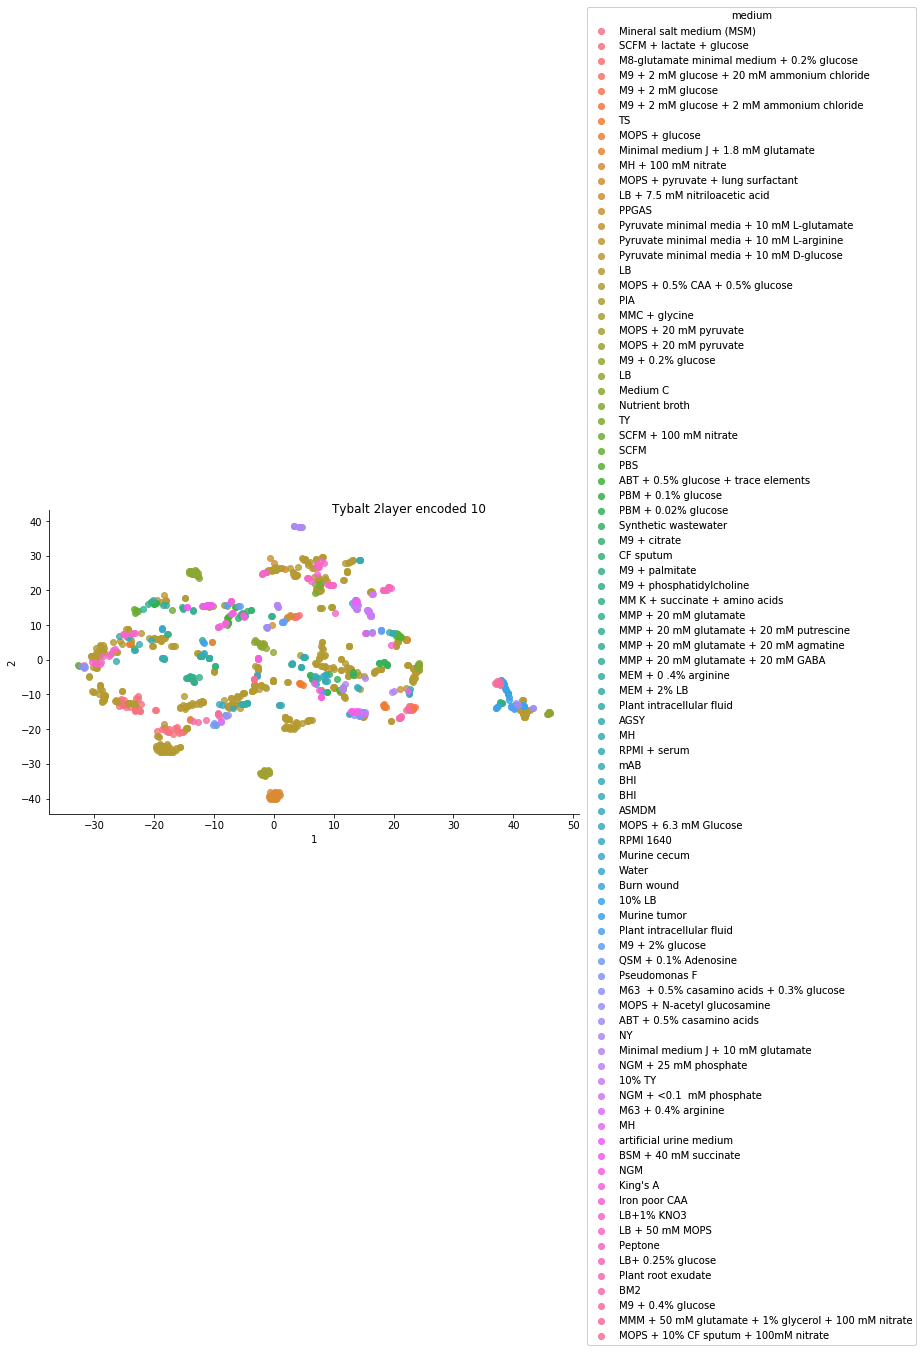

In [7]:
# Plot
# Note: t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

fg = sns.lmplot(x = '1', y = '2', data = X_new, hue = 'medium', fit_reg = False)
fg.add_legend()
fig_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/viz/'+file_name+'.png'
fg.fig.suptitle(file_name.replace('_',' ').capitalize())
fg.savefig(fig_file)

# Plot for eADAGE doesn't have labels
#fg=sns.jointplot(x="1", y="2", data=tsne_X, kind='hex', stat_func=None);
